In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

Text(0, 0.5, '')

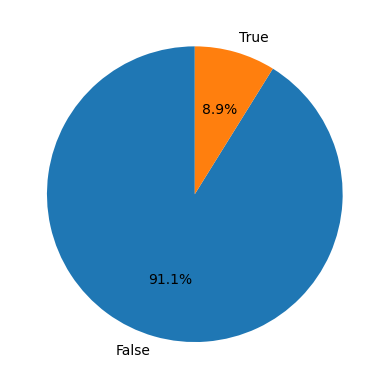

In [9]:
df.job_work_from_home.value_counts().plot(kind='pie', startangle=90, autopct='%1.1f%%')
plt.ylabel('')


Text(0, 0.5, '')

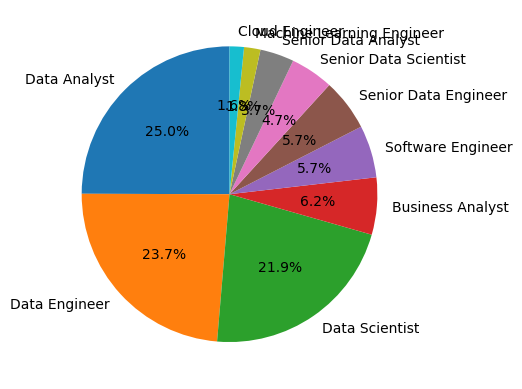

In [10]:
df.job_title_short.value_counts().plot(kind='pie', startangle=90,autopct='%1.1f%%')
plt.ylabel('')

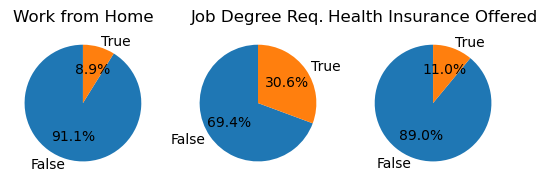

In [16]:
fig, ax = plt.subplots(1, 3)

dict_column = {'job_work_from_home': 'Work from Home',
'job_no_degree_mention': 'Job Degree Req.',
'job_health_insurance': 'Health Insurance Offered'}

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(), startangle=90, autopct='%1.1f%%', labels=['False', 'True'])
    ax[i].set_title(title)

plt.show()

Problems

In [23]:
df_DA = df[df['job_title_short']=='Data Analyst']

df_DAC = df_DA.groupby('job_title_short')['job_health_insurance'].value_counts()

Text(0.5, 1.0, 'Proportion of Data Analyst Jobs Mentioning Health Insurance')

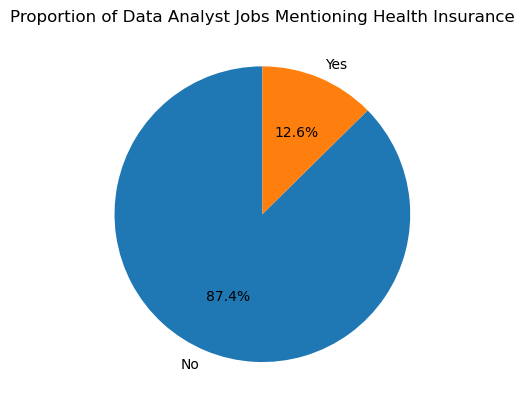

In [26]:
plt.pie(df_DAC, labels=['No', 'Yes'], startangle=90, autopct='%1.1f%%')
plt.title('Proportion of Data Analyst Jobs Mentioning Health Insurance')

In [42]:
df_schedules = df[df['job_schedule_type'].isin(['Full-time', 'Part-time'])]


V1 = df_schedules['job_schedule_type'].value_counts()

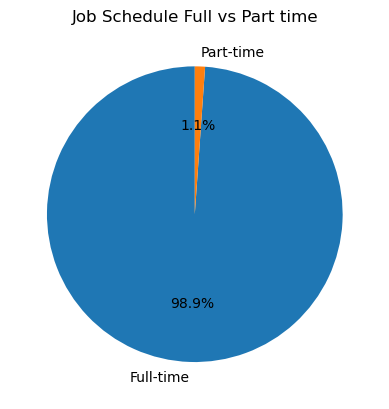

In [61]:
plt.pie(V1, labels=V1.index, startangle=90, autopct='%1.1f%%')
plt.title('Job Schedule Full vs Part time')
plt.show()

In [74]:
df_US = df[df['job_country']=='United States']
df_US = df_US.job_no_degree_mention.value_counts()
df_US

job_no_degree_mention
False    169655
True      36637
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Jobs Mentioning Degrees for US Job Postings')

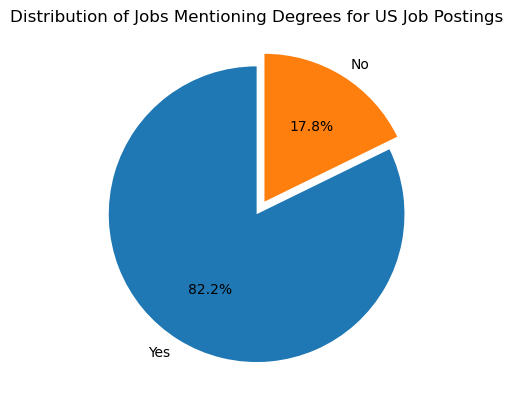

In [76]:
plt.pie(df_US, labels=['Yes', 'No'], explode=(0, 0.1), startangle=90, autopct='%1.1f%%')
plt.title('Distribution of Jobs Mentioning Degrees for US Job Postings')
